In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Removing Outliers using Inter-Quartile Range

In [5]:
def remove_outliers_iqr(df):
    features = df.drop('diagnosis', axis=1)
    Q1 = features.quantile(0.25)
    Q3 = features.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]
df_cleaned = remove_outliers_iqr(df)
print(df.shape)
print(df_cleaned.shape)

(569, 32)
(346, 32)


In [6]:
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### Tuning of hyperparameters

In [31]:
from sklearn.metrics import accuracy_score

C_values = [0.1, 1, 10, 100]
gamma_values = [1, 0.1, 0.01, 0.001]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        print(f"C={C}, gamma={gamma}, Accuracy={acc:.4f}")

C=0.1, gamma=1, Accuracy=0.8429
C=0.1, gamma=0.1, Accuracy=0.8429
C=0.1, gamma=0.01, Accuracy=0.9714
C=0.1, gamma=0.001, Accuracy=0.8429
C=1, gamma=1, Accuracy=0.8429
C=1, gamma=0.1, Accuracy=0.9857
C=1, gamma=0.01, Accuracy=0.9857
C=1, gamma=0.001, Accuracy=0.9714
C=10, gamma=1, Accuracy=0.8429
C=10, gamma=0.1, Accuracy=0.9857
C=10, gamma=0.01, Accuracy=0.9857
C=10, gamma=0.001, Accuracy=0.9857
C=100, gamma=1, Accuracy=0.8429
C=100, gamma=0.1, Accuracy=0.9857
C=100, gamma=0.01, Accuracy=0.9571
C=100, gamma=0.001, Accuracy=0.9857


In [32]:
for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    y_pred = svm_linear.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"C={C},Accuracy={acc:.4f}")
    

C=0.1,Accuracy=0.9857
C=1,Accuracy=0.9714
C=10,Accuracy=0.9429
C=100,Accuracy=0.9429


### SVM with Linear Kernel

In [33]:
svm_linear = SVC(kernel='linear', C=0.1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("SVM (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.98      1.00      0.99        59

    accuracy                           0.99        70
   macro avg       0.99      0.95      0.97        70
weighted avg       0.99      0.99      0.99        70



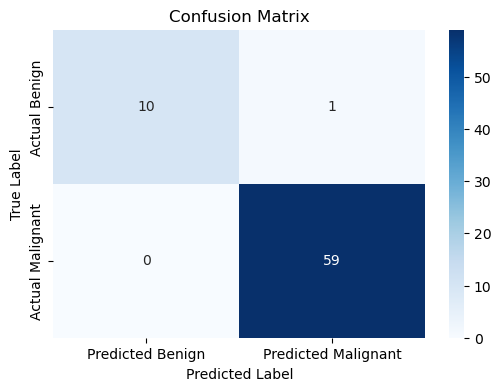

In [34]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### SVM with RBF Kernel

In [35]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("SVM (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

SVM (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.98      1.00      0.99        59

    accuracy                           0.99        70
   macro avg       0.99      0.95      0.97        70
weighted avg       0.99      0.99      0.99        70



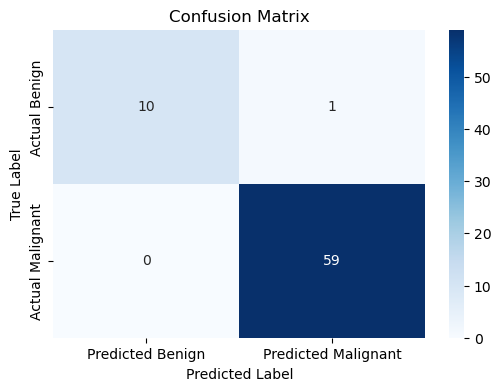

In [36]:
cm2 = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(SVC(kernel='rbf', C=1.0, gamma='scale'),
                            X_scaled, y, cv=5)

print("Cross-Validation Accuracy (RBF):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy (RBF): [0.97142857 0.95652174 0.97101449 0.97101449 0.97101449]
Mean Accuracy: 0.968198757763975


### Dimensionality Reduction using PCA for Plotting

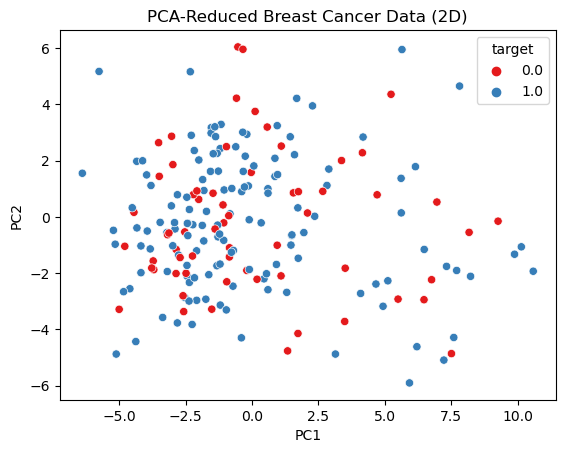

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

X_vis = pd.DataFrame(X_2D, columns=["PC1", "PC2"])
X_vis["target"] = y

sns.scatterplot(data=X_vis, x="PC1", y="PC2", hue="target", palette='Set1')
plt.title("PCA-Reduced Breast Cancer Data (2D)")
plt.show()

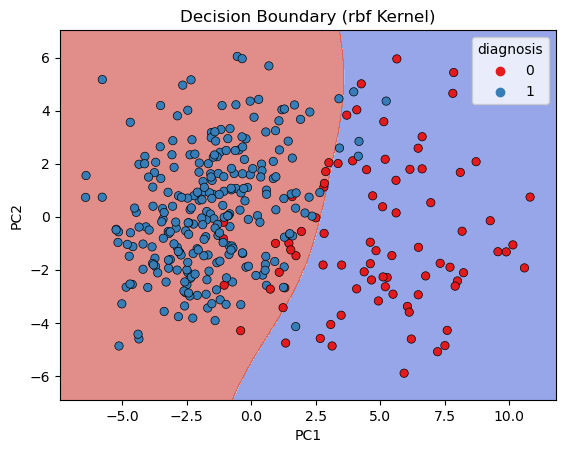

In [39]:
def plot_decision_boundary(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"Decision Boundary ({clf.kernel} Kernel)")
    plt.show()

svm_vis = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_vis.fit(X_2D, y)
plot_decision_boundary(svm_vis, X_2D, y)